In [1]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#A demonstration of hyperparameter optimization
#Jeremy Kedziora
#Applied Machine Learning, 29 September 2022
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold

import seaborn as sb


In [3]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#Preliminaries
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
RANDOMSTATE = 8    #set seed for reproducibility -- everybody likes 42... but I like 8
np.random.seed(RANDOMSTATE)    #use numpy to set the seed for pseudorandom number generation


In [8]:
#@@@@@@@@@@@@
#read in data
#@@@@@@@@@@@@
filepath = '/home/kedziora/Projects/CSC_2621/Lab_Assignments/Lab_2_data_gathering/titanic_filled.csv'    #set the path to the data
data = pd.read_csv(filepath)    #bring the data into memory


In [9]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#Set up the model specification
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
response_name = 'Survived'    #specify the response variable
#age_var = 'Age_fill_KNN'
age_var = 'Age_fill_mean'

data['Pclass'] = [str(x) for x in data['Pclass']]    #turn the passanger class variable in to a categorical
data = pd.get_dummies(data[['Survived','Pclass','Sex',age_var,'SibSp','Parch','Fare']])    #one hot encode the categorical variables
predictor_names = [age_var
                 ,'SibSp'
                 ,'Parch'
                 ,'Fare'
                 ,'Pclass_1'
                 ,'Pclass_2'
                 ,'Pclass_3'
                 ,'Sex_male']    #set up the predictors

#data['Age'].fillna(data['Age'].mean(),inplace = True)


In [10]:
#@@@@@@@@@@@@@@@@@@@@@@@@@
#run the Randomized search
#@@@@@@@@@@@@@@@@@@@@@@@@@
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)#RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model = RandomForestClassifier()

space = dict()
space['n_estimators'] = np.arange(start = 10,stop = 100,step = 10)
space['criterion'] = ["gini", "entropy", "log_loss"]
space['max_depth'] = np.arange(start = 5,stop = 20,step = 1)
space['min_samples_split'] = np.arange(start = 2,stop = 50,step = 1)
space['min_samples_leaf'] = np.arange(start = 1,stop = 50,step = 1)
space['max_features'] = ["sqrt", "log2", None]
space['max_leaf_nodes'] = np.arange(start = 5,stop = 50,step = 1)

# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1,verbose = 3)
# # execute search
result = search.fit(data[predictor_names], data['Survived'])
# # summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=32, min_samples_split=30, n_estimators=60;, score=0.815 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=25, min_samples_leaf=1, min_samples_split=29, n_estimators=20;, score=0.826 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=25, min_samples_leaf=1, min_samples_split=29, n_estimators=20;, score=0.803 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=25, min_samples_leaf=1, min_samples_split=29, n_estimators=20;, score=0.820 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=25, min_samples_leaf=1, min_samples_split=29, n_estimators=20;, score=0.854 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, max_lea

[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, max_leaf_nodes=36, min_samples_leaf=27, min_samples_split=46, n_estimators=30;, score=0.820 total time=   0.1s
[CV 1/5] END criterion=log_loss, max_depth=8, max_features=sqrt, max_leaf_nodes=12, min_samples_leaf=17, min_samples_split=21, n_estimators=60;, score=0.754 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=8, max_features=sqrt, max_leaf_nodes=12, min_samples_leaf=17, min_samples_split=21, n_estimators=60;, score=0.809 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, max_leaf_nodes=13, min_samples_leaf=41, min_samples_split=42, n_estimators=10;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, max_leaf_nodes=13, min_samples_leaf=41, min_samples_split=42, n_estimators=10;, score=0.815 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, max_leaf_nodes=13, min_samples_leaf=41, min_samples_split=


[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, max_leaf_nodes=14, min_samples_leaf=29, min_samples_split=15, n_estimators=30;, score=0.792 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, max_leaf_nodes=14, min_samples_leaf=29, min_samples_split=15, n_estimators=30;, score=0.803 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, max_leaf_nodes=12, min_samples_leaf=20, min_samples_split=17, n_estimators=70;, score=0.831 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, max_leaf_nodes=43, min_samples_leaf=17, min_samples_split=19, n_estimators=40;, score=0.749 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, max_leaf_nodes=43, min_samples_leaf=17, min_samples_split=19, n_estimators=40;, score=0.831 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, max_leaf_nodes=43, min_samples_leaf=17, min_samples_split=19

[CV 1/5] END criterion=log_loss, max_depth=16, max_features=sqrt, max_leaf_nodes=37, min_samples_leaf=26, min_samples_split=13, n_estimators=70;, score=0.749 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=16, max_features=sqrt, max_leaf_nodes=37, min_samples_leaf=26, min_samples_split=13, n_estimators=70;, score=0.787 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=16, max_features=sqrt, max_leaf_nodes=37, min_samples_leaf=26, min_samples_split=13, n_estimators=70;, score=0.775 total time=   0.1s
[CV 4/5] END criterion=log_loss, max_depth=16, max_features=sqrt, max_leaf_nodes=37, min_samples_leaf=26, min_samples_split=13, n_estimators=70;, score=0.787 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, max_leaf_nodes=21, min_samples_leaf=49, min_samples_split=38, n_estimators=40;, score=0.826 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, max_leaf_nodes=21, min_samples_leaf=49, min_samples

[CV 4/5] END criterion=log_loss, max_depth=9, max_features=log2, max_leaf_nodes=46, min_samples_leaf=41, min_samples_split=7, n_estimators=70;, score=0.758 total time=   0.1s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=log2, max_leaf_nodes=46, min_samples_leaf=41, min_samples_split=7, n_estimators=70;, score=0.809 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, max_leaf_nodes=12, min_samples_leaf=30, min_samples_split=47, n_estimators=50;, score=0.809 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, max_leaf_nodes=12, min_samples_leaf=30, min_samples_split=47, n_estimators=50;, score=0.837 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, max_leaf_nodes=12, min_samples_leaf=30, min_samples_split=47, n_estimators=50;, score=0.826 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, max_leaf_nodes=22, min_samples_leaf=1, min_samples_split=4, n_estimat

[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=34, min_samples_leaf=14, min_samples_split=38, n_estimators=60;, score=0.809 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=34, min_samples_leaf=14, min_samples_split=38, n_estimators=60;, score=0.815 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=34, min_samples_leaf=14, min_samples_split=38, n_estimators=60;, score=0.781 total time=   0.1s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, max_leaf_nodes=35, min_samples_leaf=26, min_samples_split=26, n_estimators=80;, score=0.781 total time=   0.1s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, max_leaf_nodes=35, min_samples_leaf=26, min_samples_split=26, n_estimators=80;, score=0.787 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, max_leaf_nodes=39, min_samples_leaf=43, min_samples_split=7, n_estimat

[CV 5/5] END criterion=entropy, max_depth=19, max_features=sqrt, max_leaf_nodes=19, min_samples_leaf=27, min_samples_split=18, n_estimators=60;, score=0.831 total time=   0.1s
[CV 1/5] END criterion=log_loss, max_depth=6, max_features=None, max_leaf_nodes=15, min_samples_leaf=42, min_samples_split=4, n_estimators=80;, score=0.726 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=6, max_features=None, max_leaf_nodes=15, min_samples_leaf=42, min_samples_split=4, n_estimators=80;, score=0.787 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=6, max_features=None, max_leaf_nodes=15, min_samples_leaf=42, min_samples_split=4, n_estimators=80;, score=0.798 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=8, max_features=None, max_leaf_nodes=42, min_samples_leaf=29, min_samples_split=29, n_estimators=10;, score=0.815 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=8, max_features=None, max_leaf_nodes=42, min_samples_leaf=29, min_samples_split=

[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=17, min_samples_leaf=11, min_samples_split=16, n_estimators=10;, score=0.749 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=17, min_samples_leaf=11, min_samples_split=16, n_estimators=10;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=18, min_samples_leaf=32, min_samples_split=25, n_estimators=20;, score=0.787 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=18, min_samples_leaf=32, min_samples_split=25, n_estimators=20;, score=0.758 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=18, min_samples_leaf=32, min_samples_split=25, n_estimators=20;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=18, min_samples_leaf=32, min_samples_split=25,

[CV 4/5] END criterion=log_loss, max_depth=11, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=37, min_samples_split=25, n_estimators=70;, score=0.775 total time=   0.1s
[CV 5/5] END criterion=log_loss, max_depth=11, max_features=sqrt, max_leaf_nodes=25, min_samples_leaf=37, min_samples_split=25, n_estimators=70;, score=0.792 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=17, max_features=sqrt, max_leaf_nodes=33, min_samples_leaf=32, min_samples_split=44, n_estimators=20;, score=0.732 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=17, max_features=None, max_leaf_nodes=7, min_samples_leaf=36, min_samples_split=18, n_estimators=80;, score=0.820 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=19, max_features=log2, max_leaf_nodes=5, min_samples_leaf=15, min_samples_split=12, n_estimators=40;, score=0.737 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=19, max_features=log2, max_leaf_nodes=5, min_samples_leaf=15, min_samples_split=12, n_

[CV 1/5] END criterion=gini, max_depth=17, max_features=log2, max_leaf_nodes=25, min_samples_leaf=15, min_samples_split=31, n_estimators=30;, score=0.754 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=17, max_features=log2, max_leaf_nodes=25, min_samples_leaf=15, min_samples_split=31, n_estimators=30;, score=0.820 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=17, max_features=log2, max_leaf_nodes=25, min_samples_leaf=15, min_samples_split=31, n_estimators=30;, score=0.820 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=17, max_features=log2, max_leaf_nodes=25, min_samples_leaf=15, min_samples_split=31, n_estimators=30;, score=0.809 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=17, max_features=log2, max_leaf_nodes=25, min_samples_leaf=15, min_samples_split=31, n_estimators=30;, score=0.831 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, max_leaf_nodes=13, min_samples_leaf=38, min_samples_split=10, n_estimators

[CV 3/5] END criterion=gini, max_depth=15, max_features=None, max_leaf_nodes=24, min_samples_leaf=8, min_samples_split=14, n_estimators=70;, score=0.826 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=15, max_features=None, max_leaf_nodes=24, min_samples_leaf=8, min_samples_split=14, n_estimators=70;, score=0.820 total time=   0.1s
[CV 4/5] END criterion=log_loss, max_depth=19, max_features=sqrt, max_leaf_nodes=21, min_samples_leaf=46, min_samples_split=23, n_estimators=70;, score=0.758 total time=   0.1s
[CV 5/5] END criterion=log_loss, max_depth=19, max_features=sqrt, max_leaf_nodes=21, min_samples_leaf=46, min_samples_split=23, n_estimators=70;, score=0.775 total time=   0.1s
[CV 1/5] END criterion=log_loss, max_depth=17, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, min_samples_split=43, n_estimators=10;, score=0.760 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=17, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8, min_samples_split=43, n

[CV 5/5] END criterion=log_loss, max_depth=7, max_features=log2, max_leaf_nodes=21, min_samples_leaf=30, min_samples_split=31, n_estimators=30;, score=0.787 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, max_leaf_nodes=23, min_samples_leaf=16, min_samples_split=5, n_estimators=60;, score=0.754 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, max_leaf_nodes=23, min_samples_leaf=16, min_samples_split=5, n_estimators=60;, score=0.815 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, max_leaf_nodes=35, min_samples_leaf=20, min_samples_split=34, n_estimators=70;, score=0.803 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, max_leaf_nodes=35, min_samples_leaf=20, min_samples_split=34, n_estimators=70;, score=0.803 total time=   0.1s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, max_leaf_nodes=35, min_samples_leaf=20, min_samples_split=3

[CV 2/5] END criterion=log_loss, max_depth=19, max_features=log2, max_leaf_nodes=27, min_samples_leaf=43, min_samples_split=20, n_estimators=30;, score=0.798 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=19, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=35, n_estimators=20;, score=0.809 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=19, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=35, n_estimators=20;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=19, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=35, n_estimators=20;, score=0.815 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=19, max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=35, n_estimators=20;, score=0.848 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, max_leaf_nodes=20, min_samples_leaf=6, min_samples

[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, max_leaf_nodes=33, min_samples_leaf=22, min_samples_split=47, n_estimators=90;, score=0.848 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, max_leaf_nodes=33, min_samples_leaf=22, min_samples_split=47, n_estimators=90;, score=0.809 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=17, max_features=log2, max_leaf_nodes=13, min_samples_leaf=21, min_samples_split=24, n_estimators=30;, score=0.721 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, max_leaf_nodes=26, min_samples_leaf=24, min_samples_split=17, n_estimators=50;, score=0.715 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, max_features=None, max_leaf_nodes=26, min_samples_leaf=24, min_samples_split=17, n_estimators=50;, score=0.820 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, max_features=None, max_leaf_nodes=26, min_samples_leaf=24, min_samples_split=17, n_estimator

[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, max_leaf_nodes=22, min_samples_leaf=39, min_samples_split=14, n_estimators=60;, score=0.770 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=16, max_features=sqrt, max_leaf_nodes=35, min_samples_leaf=11, min_samples_split=30, n_estimators=60;, score=0.826 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=16, max_features=log2, max_leaf_nodes=13, min_samples_leaf=10, min_samples_split=19, n_estimators=70;, score=0.760 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=16, max_features=log2, max_leaf_nodes=13, min_samples_leaf=10, min_samples_split=19, n_estimators=70;, score=0.815 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=16, max_features=log2, max_leaf_nodes=13, min_samples_leaf=10, min_samples_split=19, n_estimators=70;, score=0.831 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, max_leaf_nodes=34, min_samples_leaf=20, min_samples_split=42, n_esti

[CV 2/5] END criterion=gini, max_depth=5, max_features=None, max_leaf_nodes=15, min_samples_leaf=22, min_samples_split=3, n_estimators=70;, score=0.826 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, max_leaf_nodes=15, min_samples_leaf=22, min_samples_split=3, n_estimators=70;, score=0.809 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, max_leaf_nodes=15, min_samples_leaf=22, min_samples_split=3, n_estimators=70;, score=0.826 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=19, max_features=sqrt, max_leaf_nodes=22, min_samples_leaf=36, min_samples_split=29, n_estimators=90;, score=0.803 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=19, max_features=sqrt, max_leaf_nodes=22, min_samples_leaf=36, min_samples_split=29, n_estimators=90;, score=0.787 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=17, max_features=None, max_leaf_nodes=21, min_samples_leaf=33, min_samples_split=45, n_estimator

[CV 2/5] END criterion=log_loss, max_depth=17, max_features=log2, max_leaf_nodes=39, min_samples_leaf=42, min_samples_split=37, n_estimators=40;, score=0.792 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=16, max_features=log2, max_leaf_nodes=23, min_samples_leaf=34, min_samples_split=29, n_estimators=80;, score=0.792 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=16, max_features=log2, max_leaf_nodes=23, min_samples_leaf=34, min_samples_split=29, n_estimators=80;, score=0.820 total time=   0.1s
[CV 4/5] END criterion=log_loss, max_depth=16, max_features=log2, max_leaf_nodes=23, min_samples_leaf=34, min_samples_split=29, n_estimators=80;, score=0.798 total time=   0.1s
[CV 5/5] END criterion=log_loss, max_depth=16, max_features=log2, max_leaf_nodes=23, min_samples_leaf=34, min_samples_split=29, n_estimators=80;, score=0.803 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, max_leaf_nodes=48, min_samples_leaf=46, min_samples

[CV 1/5] END criterion=log_loss, max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=24, min_samples_split=23, n_estimators=30;, score=0.743 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=24, min_samples_split=23, n_estimators=30;, score=0.775 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=24, min_samples_split=23, n_estimators=30;, score=0.758 total time=   0.1s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=24, min_samples_split=23, n_estimators=30;, score=0.809 total time=   0.1s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=24, min_samples_split=23, n_estimators=30;, score=0.803 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, max_leaf_nodes=14, min_samples_leaf=22, min_sample

[CV 4/5] END criterion=entropy, max_depth=16, max_features=sqrt, max_leaf_nodes=31, min_samples_leaf=29, min_samples_split=21, n_estimators=90;, score=0.787 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, max_features=sqrt, max_leaf_nodes=31, min_samples_leaf=29, min_samples_split=21, n_estimators=90;, score=0.831 total time=   0.1s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=log2, max_leaf_nodes=41, min_samples_leaf=24, min_samples_split=18, n_estimators=30;, score=0.715 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, max_leaf_nodes=41, min_samples_leaf=24, min_samples_split=18, n_estimators=30;, score=0.787 total time=   0.1s
[CV 1/5] END criterion=log_loss, max_depth=14, max_features=log2, max_leaf_nodes=12, min_samples_leaf=6, min_samples_split=30, n_estimators=90;, score=0.765 total time=   0.2s
[CV 2/5] END criterion=log_loss, max_depth=14, max_features=log2, max_leaf_nodes=12, min_samples_leaf=6, min_samples_s

[CV 4/5] END criterion=entropy, max_depth=16, max_features=None, max_leaf_nodes=13, min_samples_leaf=3, min_samples_split=15, n_estimators=30;, score=0.809 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, max_features=None, max_leaf_nodes=13, min_samples_leaf=3, min_samples_split=15, n_estimators=30;, score=0.848 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, max_leaf_nodes=46, min_samples_leaf=29, min_samples_split=16, n_estimators=30;, score=0.798 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, max_leaf_nodes=31, min_samples_leaf=48, min_samples_split=4, n_estimators=90;, score=0.726 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, max_leaf_nodes=31, min_samples_leaf=48, min_samples_split=4, n_estimators=90;, score=0.787 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, max_leaf_nodes=31, min_samples_leaf=48, min_samples_split=4, n_estimators=

[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=9, min_samples_split=36, n_estimators=80;, score=0.749 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=9, min_samples_split=36, n_estimators=80;, score=0.815 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=9, min_samples_split=36, n_estimators=80;, score=0.815 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, max_leaf_nodes=17, min_samples_leaf=9, min_samples_split=36, n_estimators=80;, score=0.820 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=27, min_samples_split=14, n_estimators=20;, score=0.798 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=27, min_samples_split=14, n_estimat

[CV 4/5] END criterion=gini, max_depth=19, max_features=None, max_leaf_nodes=14, min_samples_leaf=45, min_samples_split=34, n_estimators=10;, score=0.792 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=19, max_features=None, max_leaf_nodes=14, min_samples_leaf=45, min_samples_split=34, n_estimators=10;, score=0.792 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=log2, max_leaf_nodes=42, min_samples_leaf=22, min_samples_split=8, n_estimators=90;, score=0.726 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=22, min_samples_split=40, n_estimators=10;, score=0.732 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=22, min_samples_split=40, n_estimators=10;, score=0.803 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, max_leaf_nodes=30, min_samples_leaf=22, min_samples_split=40, n_estimat

[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=16, min_samples_leaf=17, min_samples_split=40, n_estimators=90;, score=0.792 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, max_leaf_nodes=32, min_samples_leaf=35, min_samples_split=47, n_estimators=90;, score=0.826 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, max_leaf_nodes=32, min_samples_leaf=35, min_samples_split=47, n_estimators=90;, score=0.826 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, max_leaf_nodes=32, min_samples_leaf=35, min_samples_split=47, n_estimators=90;, score=0.837 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, max_leaf_nodes=32, min_samples_leaf=35, min_samples_split=47, n_estimators=90;, score=0.826 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=17, max_features=log2, max_leaf_nodes=27, min_samples_leaf=31, min_samples_split=45

[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, max_leaf_nodes=33, min_samples_leaf=26, min_samples_split=28, n_estimators=30;, score=0.815 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, max_leaf_nodes=33, min_samples_leaf=26, min_samples_split=28, n_estimators=30;, score=0.781 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, max_leaf_nodes=33, min_samples_leaf=26, min_samples_split=28, n_estimators=30;, score=0.775 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, max_leaf_nodes=28, min_samples_leaf=42, min_samples_split=30, n_estimators=70;, score=0.787 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, max_leaf_nodes=28, min_samples_leaf=42, min_samples_split=30, n_estimators=70;, score=0.792 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, max_leaf_nodes=19, min_samples_leaf=20, min_samples_split=2, n_estimato

[CV 3/5] END criterion=log_loss, max_depth=17, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=24, n_estimators=60;, score=0.815 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, max_leaf_nodes=9, min_samples_leaf=27, min_samples_split=9, n_estimators=30;, score=0.792 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, max_leaf_nodes=9, min_samples_leaf=27, min_samples_split=9, n_estimators=30;, score=0.826 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, max_leaf_nodes=9, min_samples_leaf=27, min_samples_split=9, n_estimators=30;, score=0.820 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=25, min_samples_leaf=10, min_samples_split=20, n_estimators=10;, score=0.760 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=6, min_samples_leaf=1, min_samples_split=26, n_estimators=80;, sco

[CV 5/5] END criterion=entropy, max_depth=16, max_features=sqrt, max_leaf_nodes=16, min_samples_leaf=2, min_samples_split=16, n_estimators=90;, score=0.831 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, max_leaf_nodes=35, min_samples_leaf=38, min_samples_split=11, n_estimators=30;, score=0.715 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, max_leaf_nodes=11, min_samples_leaf=36, min_samples_split=30, n_estimators=40;, score=0.715 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, max_leaf_nodes=11, min_samples_leaf=36, min_samples_split=30, n_estimators=40;, score=0.826 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, max_leaf_nodes=11, min_samples_leaf=36, min_samples_split=30, n_estimators=40;, score=0.815 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, max_leaf_nodes=11, min_samples_leaf=36, min_samples_split=30, n_esti

[CV 4/5] END criterion=log_loss, max_depth=16, max_features=None, max_leaf_nodes=12, min_samples_leaf=26, min_samples_split=24, n_estimators=10;, score=0.826 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=16, max_features=None, max_leaf_nodes=12, min_samples_leaf=26, min_samples_split=24, n_estimators=10;, score=0.826 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=47, min_samples_leaf=47, min_samples_split=40, n_estimators=80;, score=0.732 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=47, min_samples_leaf=47, min_samples_split=40, n_estimators=80;, score=0.781 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=11, min_samples_split=16, n_estimators=70;, score=0.792 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=11, min_samples_split=16, n_e

/home/kedziora/.conda/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kedziora/.conda/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

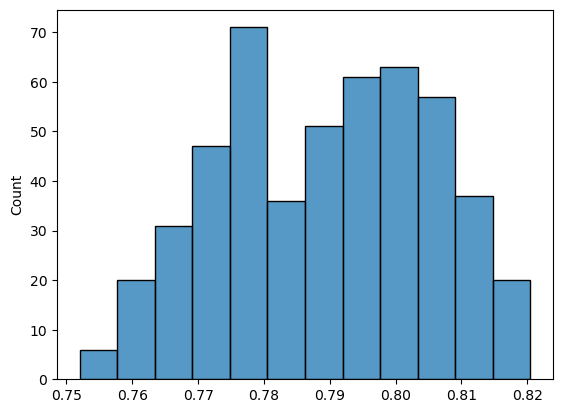

In [7]:
#@@@@@@@@@@@@@@@@@
#make a hist plot!
#@@@@@@@@@@@@@@@@@
sb.histplot(result.cv_results_['mean_test_score'])


/home/kedziora/.conda/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kedziora/.conda/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

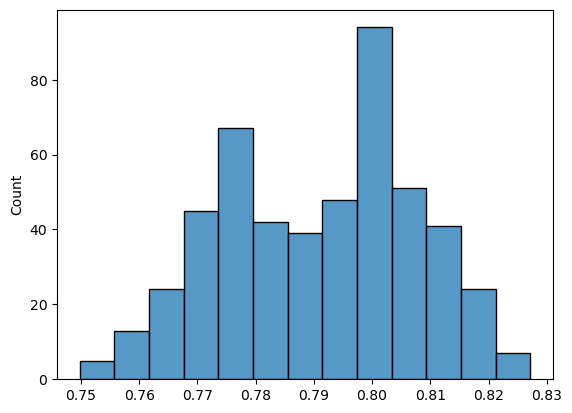

[CV 1/5] END criterion=log_loss, max_depth=11, max_features=None, max_leaf_nodes=8, min_samples_leaf=42, min_samples_split=8, n_estimators=90;, score=0.726 total time=   0.2s
[CV 2/5] END criterion=log_loss, max_depth=11, max_features=None, max_leaf_nodes=8, min_samples_leaf=42, min_samples_split=8, n_estimators=90;, score=0.787 total time=   0.2s
[CV 3/5] END criterion=log_loss, max_depth=11, max_features=None, max_leaf_nodes=8, min_samples_leaf=42, min_samples_split=8, n_estimators=90;, score=0.798 total time=   0.2s
[CV 4/5] END criterion=log_loss, max_depth=11, max_features=None, max_leaf_nodes=8, min_samples_leaf=42, min_samples_split=8, n_estimators=90;, score=0.792 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=41, min_samples_leaf=28, min_samples_split=46, n_estimators=90;, score=0.787 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=41, min_samples_leaf=28, min_samples_split=46, n_est

In [11]:
sb.histplot(result.cv_results_['mean_test_score'])
